<h1> Assignment 3</h1>
<ul>
<p>General Info:</p>
<ul>
    <li> <b>Hand-In Date</b>: 21st of Nov 2020, by 23:59 </li>
    <li> <b>Hand-In Format</b>: as jupyter notebook (run once through) AND printed as PDF via e-class. The naming format shold be your studentId_Assignment3.filetype (pdf or ipynb).</li>
    <li><b>Late Hand-In Penalty</b>: -10% of your points per late-day</li>  
    </ul>
<h2><b>Topics Covered: </b></h2>
<ul>
    This assignment is about the engineering process of blackbox optimization. The idea behind this is to keep the 'spirit' of the assignment as close as possible to a real-life engineering/research task while still being gradeable and not too overwhelming content wise, as everyone is probably busy with projects and studying for exams as well. <br/>
    During this assignment, you establish several baselines and then propose and test an additional candidate solution. During A2 we followed a similar process, finishing with an algorithm performance analysis and a candidate solution recommendation. As the class has now covered a larger percentage of material, this time you have the freedom to choose and implement one candidate solution. <br/>
    The algorithms explored in this assignment are Random Search, Grid Search, Particle Swarm Optimization as benchmarks as well as one meta-heuristic algorithm of your choosing.<br/>
    To maximize the benefit gained from this assignment, we urge you to try to maximize the performance of each and every benchmark first, before attempting to beat their performance with your proposed solution. <br/>
    </ul>
    
<h2><b>Marking Table: </b></h2>
<ul>
    There is a total of 100+10 points in this assignment. <br/>
    <li> <b>Task 1, 16 points</b>: Implement and explain <b>Random Search</b> and <b>Grid Search</b> as baselines for performance. <br />
    <li> <b>Task 2, 25 points</b>: Explain, implement and tune a <b>Particle Swarm Optimization</b> method. <br/>
  <li> <b>Task 3, 25 points</b>: Nominate, explain, implement and tune a <b>meta-heuristic algorithm</b> of your choice.<br/>
  <li> <b>Task 4, 24 points</b>: Compare all 4 algorithm implementations' performance on all 3 black box problems.<br/>
  <li> <b>Bonus, 10 points</b>: Come up with, justify and implement a set of additional metrics for above comparison. Bonus points will be awarded on additional insight gained through the metrics. <br/>
  <li> <b>Task 5, 10 points</b>: Spend some time thinking about how the algorithm performance would be different if the black boxes were categorical problems, write down your thoughts. Points will be given for arguments, not opinions :-)<br/>

</ul>
    
<h2><b>Grading/Tips</b></h2>
<ul>
    <li> <b> Pseudocode: </b> <url>https://en.wikipedia.org/wiki/Pseudocode</url>. The provided pseudocode should follow the hierarchical structure of the to-be-written code <b>AFTER</b> the markdown cell has been executed. It should be detailed enough to highlight the specifics of the algorithm, but doesn't have to be at the explicit variable level. The goal here is to provide a clear reading instruction for your code. <br>
    <li> <b> Comparison how-to </b>: In engineering, a comparison implies ranking based on metrics. Metrics can be numericals (0.1 vs 100) or cathegoricals (easy vs difficult). Where possible,  non-arbitrary numericals are preferable (walltime in [ms]) are preferable to arbitrary numericals ('speediness' from [1...10]) or cathegoricals (slower ... faster). Where cathegoricals are used, it is helpful to justify why a candidate is assigned a certain metric value. If a non-arbitrary numerical metric is easily available, using a similar arbitrary metrics will not give the same amount of points (for example, execution time)!.
    <li> <b>Aiming for an appropriate value:</b> A proper comparison requires a good understanding of what a reasonably good value is. The best result of a 'tight' grid search will be appropriate for this. Maybe there is a smart way of narrowing down a good area first... <br>
    <li> <b>Testing for stability:</b> 2 of the black boxes have random components, setting a different np.random.seed() for 5 runs will be sufficient 'stability' analysis. More is always welcome, however.
        


<h2> Task 0, The 3 Black Boxes </h2>
<ul>
    <li> Make sure you can import the Blackbox_Problems.py file
    <li> In the Blackbox_Problems.py file, which is scrambled, there are three problem functions: problem_1, problem_2, problem_3.
    <li> problem_1 and problem_2 have 2 input dimensions, problem_3 has 4, as it a superposition of problem_1 and problem_2
    <li> problem_2 has randomized noise, so does problem_3.
    <li> the cell below demonstrates how to import and call the problems.


In [17]:
from Blackbox_Problems_fixed import problem_1, problem_2, problem_3

# all three problems have 2 input dimensions
# the problems can be queried in tensors, matrices, vectors and single queries.
# internally, numpy does a lot of broadcasting, so querying with different dimensionalities is possible.
# but for safety reasons I would recommend making sure the two inputs have the same shape.
import numpy as np
# single values
x_one = np.array(1.0)
y_one = np.array(3.0)
z_one = problem_1(x_one, y_one)
print('Queried with two single values, returns a value of ', z_one, ' ,shape: ', z_one.shape)

# arrays, for populations maybe
x_arr = np.linspace(1,9, 20)
y_arr = np.linspace(1,9, 20)
z_arr = problem_2(x_arr, y_arr)
print('Queried with two arrays of shape', x_arr.shape, y_arr.shape, 'it returns an array of shape:', z_arr.shape)

# matrices ... like ... in a grid maybe
steps = 20
x = 0.01*np.arange(-steps/2, steps/2)
y = 0.01*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)
Z = problem_3(X, Y, X, Y)
print('Queried with 4 matrices of shape', X.shape, Y.shape, 'it returns a matrix of shape:', Z.shape)

Queried with two single values, returns a value of  27.78088786085412  ,shape:  ()
Queried with two arrays of shape (20,) (20,) it returns an array of shape: (20,)
Queried with 4 matrices of shape (20, 20) (20, 20) it returns a matrix of shape: (20, 20)


<h2> Task 1, Benchmarks (16): </h2>
<ul>
    <li> <b>Task 1a - Random Search (4+4):</b> <br>
        <ul>
            <li> <b> Explain Random Search (4) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li><b>Implement a Random search (4)</b>. The implemented method should be applicable to all 3 black boxes, optimally as callable function to prevent unnecessary C&P of code. <br>
            </ul>
    <li><b>Task 1b - Grid Search (4+4):</b> <br>
                <ul>
            <li> <b> Explain Grid Search (4) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li><b>Implement a Grid Search (4)</b>. The implemented method should be applicable to all 3 black boxes, optimally as callable function to prevent unnecessary C&P of code. <br>
            </ul>



*Random search is a method to obtain the optimal solution of the function by using random number to find the minimum point, the hyperparameter of random search is usually the iteration_time and the range of the random number generated, and the termination criteria is the solution satisfy some conditions or reach the iteration times. The general advantages is the solution is optimal, and it is appropriate when we don't know the situation of the function, for black box problem we can use random search to roughly guess the structure of the function. Disadvantages of Random serch is it needs a lot of time to find optimal solution when the data set is massive, and in most cases, the location of the searched target does not obey the uniform distribution, and the randomness of the random search trajectory and the uniformity of the dispersion of the search force will lower the efficiency of random search*

In [2]:
# Random Search

def Random_search(iteration_time, problem_num, upper, lower, seed):
    if problem_num == 1:
        iter_counter = 0
        target = float('inf')
        
        while iter_counter <= iteration_time:
            x = np.random.uniform(lower, upper)
            y = np.random.uniform(lower, upper)
            temp = problem_1(x, y)
            if temp < target:
                target = temp
                position = [x, y]
            iter_counter += 1
    
        return target

    elif problem_num == 2:
        
        iter_counter = 0
        list_iter = 0
        
        x = np.linspace(1, 9, 20)
        y = np.linspace(1, 9, 20)
        
        np.random.seed(seed)
        z = problem_2(x, y)
        target = z[np.random.randint(0, 20)]
        
        while list_iter <= 50:
            
            index = np.random.randint(0, 20)
            temp = z[index]
            if temp < target:
                target = temp
            list_iter += 1
        
        while iter_counter <= iteration_time:
            list_iter = 0
            np.random.shuffle(x)
            np.random.shuffle(y)
            np.random.seed(seed)
            z = problem_2(x,y)
            iter_counter += 1
            
            while list_iter <= 50:
            
                index = np.random.randint(0, 20)
                temp = z[index]
                if temp < target:
                    target = temp
                list_iter += 1
                      
        return target
        
    elif problem_num == 3:
        
        iter_counter = 0
        list_iter = 0
        steps = 20
        x = 0.01*np.arange(-steps/2, steps/2)
        y = 0.01*np.arange(-steps/2, steps/2)
        X, Y = np.meshgrid(x, y)
        np.random.seed(seed)
        Z = problem_3(X, Y, X, Y)
        target = float('inf')
        
        while list_iter < 5000:
            index_1 = np.random.randint(0, 20)
            index_2 = np.random.randint(0, 20)
            temp = Z[index_1][index_2]
            
            if temp < target:
                target = temp
            list_iter += 1
            
        while iter_counter <= iteration_time:
            
            np.random.shuffle(x)
            np.random.shuffle(y)
            X, Y = np.meshgrid(x, y)
            np.random.seed(seed)
            Z = problem_3(X, Y, X, Y)
            
            while list_iter < 8000:
                index_1 = np.random.randint(0, 20)
                index_2 = np.random.randint(0, 20)
                temp = Z[index_1][index_2]
            
                if temp < target:
                    target = temp
                list_iter += 1
                
            iter_counter += 1
                     
        return target  
 

In [3]:
#Implementation
import time

#Problem 1
start =time.time()
seed_list = [5,23,7,43,1]
result = float('inf')

for _ in range(5):
    temp = Random_search(100000, 1, 9.0, -9.0, seed_list[_])
    if temp < result:
        result = temp
    
print("The smallest value is {}".format(result))
end = time.time()
print('Running time: %s Seconds'%(end-start))
print("*********************************************")

#Problem 2
start =time.time()
seed_list = [5,23,7,43,1]
result = float('inf')

for _ in range(5):
    temp = Random_search(10000, 2, 9.0, -9.0, seed_list[_])
    if temp < result:
        result = temp

print("The smallest value is {}".format(result))
end = time.time()
print('Running time: %s Seconds'%(end-start))
print("*********************************************")

#Problem 3
start =time.time()
seed_list = [5,23,7,43,1]
result = float('inf')

for _ in range(5):
    temp = Random_search(10000, 3, 9.0, -9.0, seed_list[_])
    if temp < result:
        result = temp
        
print("The smallest value is {}".format(result))
end = time.time()
print('Running time: %s Seconds'%(end-start))

The smallest value is -23.59669939190173
Running time: 9.521228790283203 Seconds
*********************************************
The smallest value is -141.43130298367325
Running time: 9.2017240524292 Seconds
*********************************************
The smallest value is -73.78578897226278
Running time: 5.712551832199097 Seconds


*In generall, grid search is exhaustive search over specified parameter values for an estimator, and the search mechanism is very simillar to exhaustive search. The grid means the data set, and there are a lot of point in the grid, we can traverse every point to find the optimal solution. And the hyperparameter of grid search is the size of the grid. General advantage is easy to find optimal solution, and general disadvantage is the computation will became huge with data set grow.*

In [10]:
# Grid Search

def Grid_search(problem_num, seed):
    
    if problem_num == 1:
        x = np.linspace(-50, 50, 100)
        y = np.linspace(-50, 50, 100)
        target = float('inf')
        
        for i in x:
            for j in y:
                np.random.seed(seed)
                temp = problem_1(i,j)
                
                if temp < target:
                    target = temp
    
        return target

    elif problem_num == 2:
        x = np.linspace(-50, 50, 100)
        y = np.linspace(-50, 50, 100)
        target = float('inf')
        
        for i in x:
            for j in y:
                np.random.seed(seed)
                temp = problem_2(i, j)
                
                if temp < target:
                    target = temp
    
        return target

    
    elif problem_num == 3:
        
        index_x = np.linspace(0, 19, 10)
        index_y = np.linspace(0, 19, 10)
        target = float('inf')
        
        steps = 20
        x = 0.01*np.arange(-steps/2, steps/2)
        y = 0.01*np.arange(-steps/2, steps/2)
        X, Y = np.meshgrid(x, y)
        np.random.seed(seed)
        Z = problem_3(X, Y, X, Y)
        
        for i in index_x:
            for j in index_y:
                temp = Z[int(i)][int(j)]
                
                if temp < target:
                    target = temp
        
        return target


In [12]:
#Implementation
import time

#Problem_1
start =time.time()
seed_list = [5,23,7,43,1]
result = float('inf')

for _ in range(5):
    temp = Grid_search(1, seed_list[_])
    if temp < result:
        result = temp
    
print("The smallest value is {}".format(result))
end = time.time()
print('Running time: %s Seconds'%(end-start))
print("*********************************************")

#Problem_2
start =time.time()
seed_list = [5,23,7,43,1]
result = float('inf')

for _ in range(5):
    temp = Grid_search(2, seed_list[_])
    if temp < result:
        result = temp
    
print("The smallest value is {}".format(result))
end = time.time()
print('Running time: %s Seconds'%(end-start))
print("*********************************************")

#Problem_3
start =time.time()
seed_list = [5,23,7,43,1]
result = float('inf')

for _ in range(5):
    temp = Grid_search(3, seed_list[_])
    if temp < result:
        result = temp
    
print("The smallest value is {}".format(result))
end = time.time()
print('Running time: %s Seconds'%(end-start))

The smallest value is -21.857562704359502
Running time: 0.9679281711578369 Seconds
*********************************************
The smallest value is -146.3618181577779
Running time: 2.2288198471069336 Seconds
*********************************************
The smallest value is -73.78578897226278
Running time: 0.0043909549713134766 Seconds


<h2> Task 2, Particle Swarm Optimization (25): </h2>
<ul>
    
<li><b>Task 2a - Explanation and a priori assessment (12)</b>:<br/>
        <ul>
            <li> <b> Explain Particle Swarm Optimization (6) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li> <b> Particle Swarm Optimization Pseudocode (4) </b>. Construct pseudocode for the method you are about to implement. The pseudocode can be also used to enhance the algorithm explanation. <br>
            <li> <b>Pre-assessment (2)</b>.Provide an a priori assessment of the expected performance of PSO compared to the other 3 methods. <br>
            <li> <b>(0)</b> What modifications to the deafult algorithm were made to increase performance (if any)? <br> 
            
   </ul>

<li><b>Task 2b - Implementation (13):</b> <br>
    Implement your Particle Swarm Optimization in python in the cell below. <br>

</ul>

*Explain Particle Swarm Optimization*

*Particle swarm optimization is an evolutionary computing technique derived from the study of predation behavior of birds in a flock. The basic idea of PSO is to seek the optimal solution through the cooperation and information sharing among individuals in flock. Every particle only have two attributes, velocity and position, use V and X to present them. There are many hyperparameters in PSO, first is w which calles Inertia factor, it is nonnegative value, bigger w means strong searching global optimization ability, and weak searching local optimization, smaller w has opposite infulence. A dynamic w can get a better optimal solution than fixed value. C1 and C2 called acceleration constant, they are usually betweem zero and four. And the termination criteria has two choices, first is reach the maximum number of iterations, and second is the deviation betweem adjacent generation is within a specficed range. The general advantage of PSO is it is simple and easy to implementation, it doesn't need gradient information, fewer parameters, and its natural real coding characteristics are particularly suitable for real optimization problems. At the same time, it has a profound intellectual background, which is suitable for both scientific research and engineering application. The general disadvantage is it is prone to premature convergence (especially in dealing with complex multi-peak search problems), poor local optimization ability and so on. PSO algorithm falls into local minima, which is mainly due to the loss of diversity of the population in the search space.*

In [ ]:
#Pseudocode for PSO

def PSO:
    for each particle i:
        Initialize velocity Vi and position Xi for particle
        Evaluate particle i and set pBesti = Xi
    
    gBest = min{pBesti}
    
    while:
        for i in range N:
            Update the velocity and position of particle i
            Evaluate particle i
            if fit(Xi) < fit(pBesti):
                pBesti = Xi
            if fit(pBesti) < fit(gBest):
                gBest = pBesti
        
    return gBest

*Pre-assessment*

*Compare to random search and grid search, PSO needs fewer iteration time, and it needs shorter time to find the optimal solution, but the solution may not the best one, it can only find approximate optimal solution, and it is less stable than grid search. For Nominated Algorithm, I can not make a clear judgement, because they are all heuristic algorithms, it need modify hyperparameters and run the code.*

*Dynamic w can get a better performance, at present, we usually use Linearly Decreasing Wight strategy, 
W = (Wini - Wend)(Gk - g)/Gk + Wend, it can adjust global and local search ability.*

In [72]:
#PSO
import matplotlib.pyplot as plt

def PSO(w, c1, c2, pN, dim, iter_time, upper, lower, problem_num, seed):
    
    X = np.zeros((pN, dim))
    V = np.zeros((pN, dim))
    
    partical_best = np.zeros((pN, dim))
    global_best = np.zeros((1, dim))
    partical_fit = np.zeros(pN)
    fit = float('inf')
    
    for i in range(pN):
        for j in range(dim):
            X[i][j] = np.random.uniform(upper, lower)
            V[i][j] = np.random.uniform(0,1)
        partical_best[i] = X[i]
        
        if problem_num == 1:
            parameter = X[i]
            np.random.seed(seed)
            tmp = problem_1(np.array(parameter[0]), np.array(parameter[1]))
        if problem_num == 2:
            parameter = X[i]
            np.random.seed(seed)
            tmp = problem_2(np.array(parameter[0]), np.array(parameter[1]))
        if problem_num == 3:
            parameter = X[i]
            np.random.seed(seed)
            tmp = problem_3(np.array(parameter[0]),np.array(parameter[1]), np.array(parameter[0]), np.array(parameter[1]))
    
        partical_fit[i] = tmp
        if tmp < fit:
            fit = tmp
            global_best = X[i]
            
    
    fitness = []
    
    for _ in range(iter_time):
        for i in range(pN):
            
            if problem_num == 1:
                parameter = X[i]
                np.random.seed(seed)
                temp = problem_1(np.array(parameter[0]), np.array(parameter[1]))
            if problem_num == 2:
                parameter = X[i]
                np.random.seed(seed)
                temp = problem_2(np.array(parameter[0]), np.array(parameter[1]))
            if problem_num == 3:
                parameter = X[i]
                np.random.seed(seed)
                temp = problem_3(np.array(parameter[0]),np.array(parameter[1]), np.array(parameter[0]), np.array(parameter[1]))
 
            
            if temp < partical_fit[i]:
                partical_fit[i] = temp
                partical_best[i] = X[i]
                
                if partical_fit[i] < fit:
                    fit = partical_fit[i]
                    global_best = X[i]
        
        w = (w-0.4)*(iter_time - _)/iter_time + 0.4
        
        for i in range(pN):
            for j in range(dim):
                V[i][j] = w*V[i][j] + c1*np.random.random()*(partical_best[i][j]-X[i][j]) + c2*np.random.random()*(global_best[j]-X[i][j])
                
            X[i] = X[i] + V[i]
        
        fitness.append(fit)

    return fitness


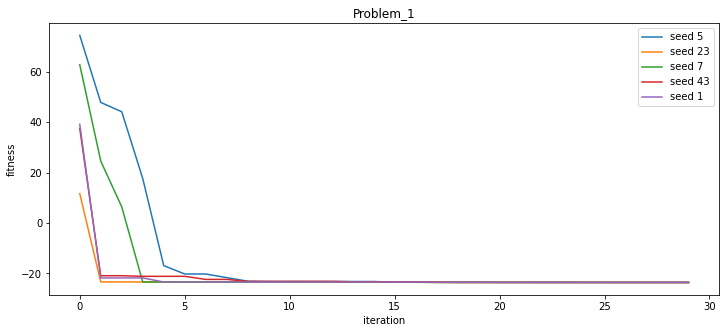

Running time: 2.1501638889312744 Seconds


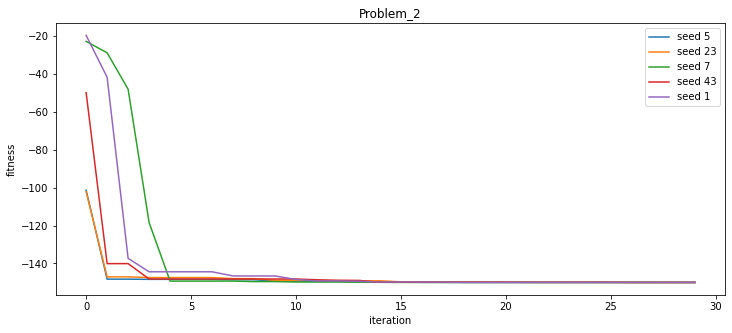

Running time: 4.411195755004883 Seconds


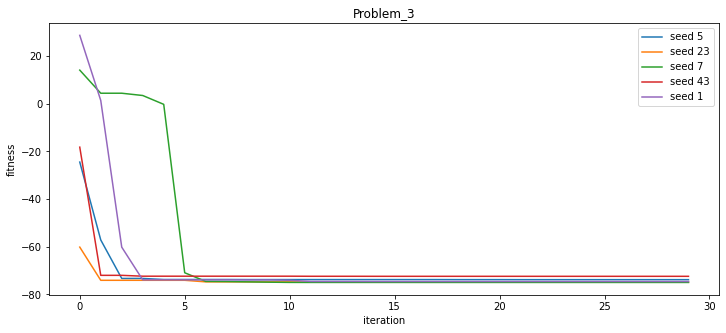

Running time: 5.996286869049072 Seconds


In [73]:
#implementation
import time

# Problem_1
start =time.time()
seed_list = [5,23,7,43,1]
plt.figure(figsize=(12,5))
plt.title("Problem_1")
plt.xlabel("iteration")
plt.ylabel("fitness")
t = np.array([t for t in range(0, 30)])
for i in seed_list:
    fitness = PSO(0.9, 2, 2, 500, 2, 30, 20, -20, 1, i)
    plt.plot(t, fitness, label = "seed {}".format(i))
plt.legend()
plt.show()
end = time.time()
print('Running time: %s Seconds'%(end-start))

# Problem_2
start =time.time()
seed_list = [5,23,7,43,1]
plt.figure(figsize=(12,5))
plt.title("Problem_2")
plt.xlabel("iteration")
plt.ylabel("fitness")
t = np.array([t for t in range(0, 30)])
for i in seed_list:
    fitness = PSO(0.9, 2, 2, 500, 2, 30, 20, -20, 2, i)
    plt.plot(t, fitness, label = "seed {}".format(i))
plt.legend()
plt.show()
end = time.time()
print('Running time: %s Seconds'%(end-start))

# Problem_3
start =time.time()
seed_list = [5,23,7,43,1]
plt.figure(figsize=(12,5))
plt.title("Problem_3")
plt.xlabel("iteration")
plt.ylabel("fitness")
t = np.array([t for t in range(0, 30)])
for i in seed_list:
    fitness = PSO(0.9, 2, 2, 500, 2, 30, 20, -20, 3, i)
    plt.plot(t, fitness, label = "seed {}".format(i))
plt.legend()
plt.show()
end = time.time()
print('Running time: %s Seconds'%(end-start))

<h2> Task 3, Your Nominated Algorithm (25): </h2>
<ul>
    
<li><b>Task 3a - Explanation and a priori assessment (12)</b>:<br/>
        <ul>
            <li> <b> Explain Your Nominated Algorithm (6) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li> <b> Your Nominated Algorithm Pseudocode (4) </b>. Construct pseudocode for the method you are about to implement. The pseudocode can be also used to enhance the algorithm explanation. <br>
            <li> <b>Pre-assessment (2)</b>.Provide an a priori assessment of the expected performance of Your Nominated Algorithm compared to the other 3 methods. <br>
            <li> <b>(0)</b> Why did you choose this algorithm?  <br>
            <li> <b>(0)</b> What modifications to the deafult algorithm were made to increase performance (if any)?<br> 
            
   </ul>

<li><b>Task 3b - Implementation (13):</b> <br>
    Implement your Your Nominated Algorithm in python in the cell below. <br>

</ul>

*Explain Your Nominated Algorithm*

*My nominated Algorithm is simulated annealing algorithm, SAA is based on the Monte Carlo iterative solution strategy of a kind of optimization algorithm, it mainly used for solving combinational optimization problem. The idea of SAA is based on the annealing principle of solid, when the temperature of the solid is high, the internal energy is larger, the interior of the solid particles in a chaotic motion quickly, when the temperature reduce, the internal energy of solid is reduced, the particles gradually tend to be orderly. SAA starts from a certain high temperature, calculate the initial solution in the high temperature state, and then generates a disturbance quantity with the preset neighborhood function, thus obtaining the new state. Compare the energy in the old state and the new state, that is, the solution of the objective function. if the energy of the new state is less than that of the old state, the state is transformed. If the energy of the new state is greater than the old state, then the transformation takes place according to a certain probality criterion.*

*The first hyperparameter of SAA is the initial temperature, the initial temperature is bigger, the probability of gathering high quality solution is bigger, and the time spent will also increase, the other hyperparameter is the minimum value of temperature, which will effect the termination criteria, a oversmall minimum temperature will result miss the optimal solution. And there are two loops in SAA, internal loop and outer loop. The termination of inner loop is whether the average value of the objective function is stable and iteration times, the termination criteria of outer loop is termination of the temperature, and the optimal value searched by algorithm remains uncharged for several successive steps.*

In [ ]:
#Pseudocode

while temperature is bigger than the minimum temperature:
    for i in internal loop iteration times:
        
        calculate objective function of the initial x
        
        generate new x with certain criterion
        
        if new x in the bound of the x:
            calculate solution of objective function with new x
            
            if new solution < solution:
                solution = new solution
            
            else:
                calculate state transition probability
                
                if random smaller than the probability:
                    
                    change x
    update temperature

*Pre-assessment*

*SAA is sensitive to the hyperparameter and disturbance strategy, initial temperature and minimal temperature can effect the result significantly, I think it can not get optimal solution at once, it may need hyperparameter modification and tuning. SAA also has a certain probability of falling into local optimal. The reason I choose this algorithm is it is simple and easy to implementation, and it also can solve NP problem efficiency. To increase the performance, I modify the Annealing strategy, slow the speed of temperature reduce, and increase iteration times of each temperature, sufficient search is necessary, it can help us find the optimal solution, but it may increase some time.*

In [164]:
#SAA

import math

def SAA(initia_T, min_T, itera_num, problem_num, seed):
    
    x = np.random.uniform(-9, 9)
    y = np.random.uniform(-9, 9)
    t = 0
    T_list = []
    z_list = []
    
    #T_list.append(initia_T)
    
    T = initia_T
    
    while T > min_T:
        for i in range(itera_num):
            
            if problem_num == 1:
                z = problem_1(np.array(x), np.array(y))
            if problem_num == 2:
                z = problem_2(np.array(x), np.array(y))
            if problem_num == 3:
                z = problem_3(np.array(x), np.array(y), np.array(x), np.array(y))
            
            
            #position = np.array([x, y])
            #position_new = position + np.random.uniform(-0.055, 0.055)*T
            xNew = x + np.random.rand() -0.5
            yNew = y + np.random.rand() -0.5
            
            if(-9 <= xNew and xNew <= 9 and -9 <= yNew and yNew <= 9):
                
                if problem_num == 1:
                    zNew = problem_1(np.array(xNew), np.array(yNew))
                if problem_num == 2:
                    zNew = problem_2(np.array(xNew), np.array(yNew))
                if problem_num == 3:
                    zNew = problem_3(np.array(xNew), np.array(yNew), np.array(xNew), np.array(yNew))
                
                if zNew < z:
                    x = xNew
                    y = yNew
                    result = zNew
                else:
                    p = math.exp(-(zNew - z)/T)
                    r = np.random.uniform(0,1)
                    if r < p:
                        x = xNew
                        y = yNew
                    
            
        t += 1
        z_list.append(result)
        T = T*0.95
        T_list.append(T)    
     
    return [T_list, z_list]


The smallest for seed 5 is -23.447474409512342


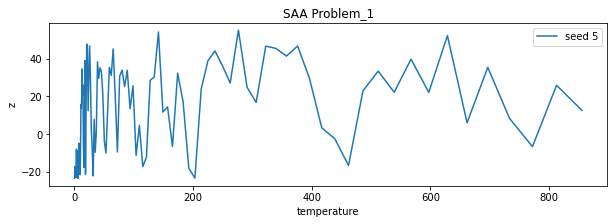

The smallest for seed 23 is -22.137904387512023


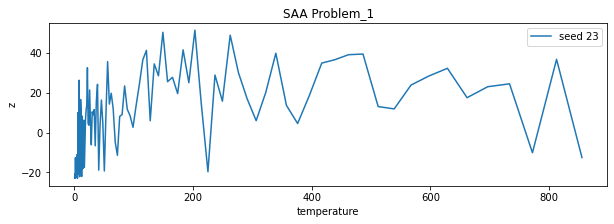

The smallest for seed 7 is -20.23583844662912


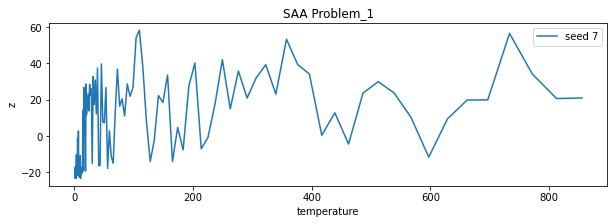

The smallest for seed 43 is 14.797206905635516


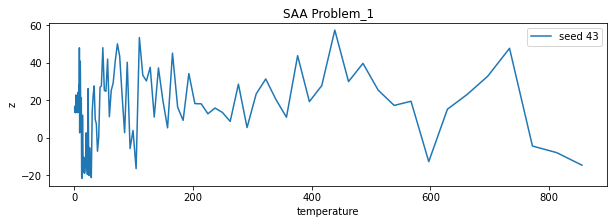

The smallest for seed 1 is -19.35844373559449


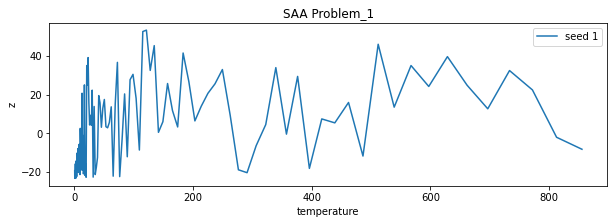

Running time: 11.530611991882324 Seconds
The smallest for seed 5 is -146.20411875853594


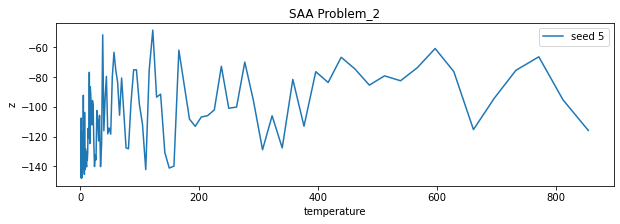

The smallest for seed 23 is -134.56707521117787


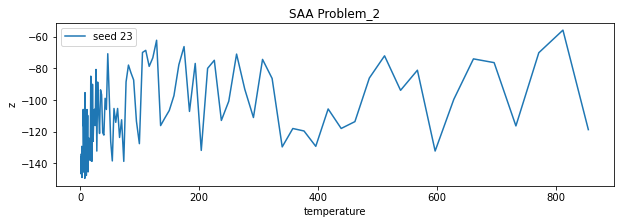

The smallest for seed 7 is -134.33583761651548


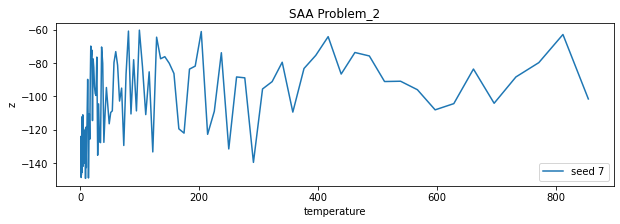

The smallest for seed 43 is -146.9956792671398


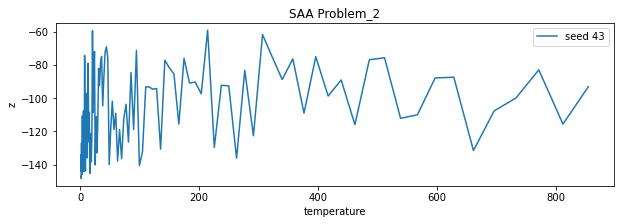

The smallest for seed 1 is -146.38843865758005


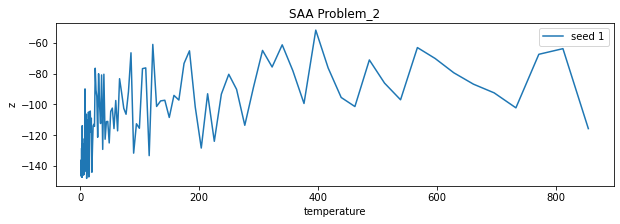

Running time: 33.78059220314026 Seconds
The smallest for seed 5 is -73.43123817693004


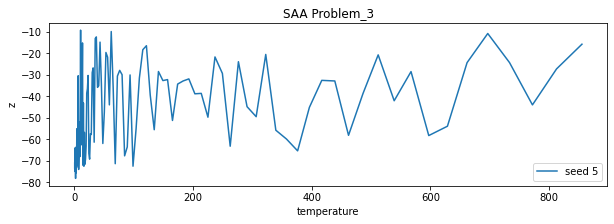

The smallest for seed 23 is -73.70250406002748


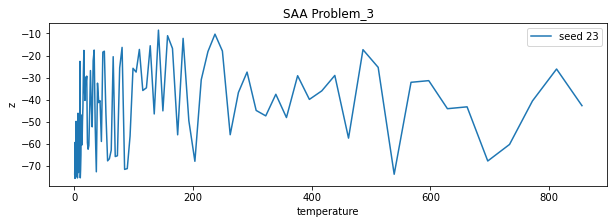

The smallest for seed 7 is -73.52044281573521


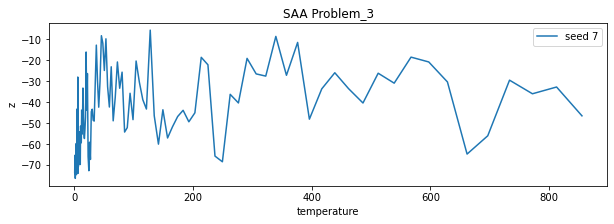

The smallest for seed 43 is -73.73150361605131


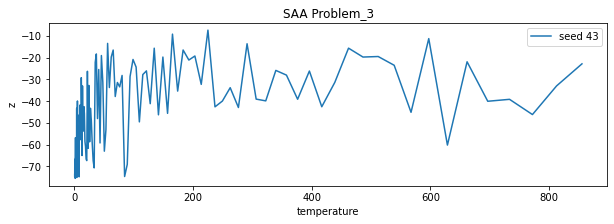

The smallest for seed 1 is -69.98988186285715


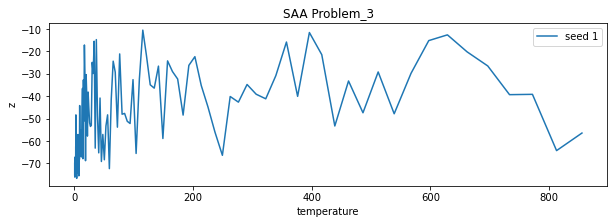

Running time: 52.38062310218811 Seconds


In [181]:
#implementation
import time

#Problem_1
start =time.time()
seed_list = [5,23,7,43,1]

for i in seed_list:
    result = SAA(900, 1, 500, 1, i)
    plt.figure(figsize=(10,3))
    plt.title("SAA Problem_1")
    plt.xlabel("temperature")
    plt.ylabel("z")
    
    plt.plot(result[0], result[1], label = "seed {}".format(i))
    print("The smallest for seed {} is {}".format(i,result[1][-1]))
    plt.legend()
    plt.show()
end = time.time()
print('Running time: %s Seconds'%(end-start))

#Problem_2
start =time.time()
seed_list = [5,23,7,43,1]

for i in seed_list:
    result = SAA(900, 1, 500, 2, i)
    plt.figure(figsize=(10,3))
    plt.title("SAA Problem_2")
    plt.xlabel("temperature")
    plt.ylabel("z")
    
    plt.plot(result[0], result[1], label = "seed {}".format(i))
    print("The smallest for seed {} is {}".format(i,result[1][-1]))
    plt.legend()
    plt.show()
end = time.time()
print('Running time: %s Seconds'%(end-start))
   
#Problem_3
start =time.time()
seed_list = [5,23,7,43,1]

for i in seed_list:
    result = SAA(900, 1, 500, 3, i)
    plt.figure(figsize=(10,3))
    plt.title("SAA Problem_3")
    plt.xlabel("temperature")
    plt.ylabel("z")
    
    plt.plot(result[0], result[1], label = "seed {}".format(i))
    print("The smallest for seed {} is {}".format(i,result[1][-1]))
    plt.legend()
    plt.show()
end = time.time()
print('Running time: %s Seconds'%(end-start))

#### <h2> Task 4, Comparison (24 + 10): </h2>
<ul>
    <li><b>Task 4a - Execute (4*2):</b><br/> Run all four tuned algorithms on several (5 or more) seeds of the problems. <br>
    <li><b>Task 4b - Compare (16):</b><br/> Compare the algorithms performance in terms of runtime (4), number of iterations (4), convergence stability (4), necessary amount of a-priori knowledge (4) and and other factors that you consider important (See Bonus). <br>
    <li><b>Task 4c - Bonus - Better Metrics (10):</b><br/> Justify and implement a set of additional metrics. These metrics should allow more in-depth algorithm performance analysis. We invite creativity, there is a lot of different aspects that optimization algorithms can be compared under! <br>


</ul>

*Execute*

*All excute are above, just below the implementation, and every algorithm run 5 seeds for all the problem*

*Compare*

*Runtime: In all the algorithm, SAA needs the longest time, but it also easy to understand, because in SAA, it need to iterate 1000 times in each temperature to make sure to find the optimal solution. PSO needs shortest time, random search and grid search's runtime is longer than PSO and shorter than SAA*

*The number of iterations for PSO is the smallest, it only needs about 30 times to find the optimal solution, random search and grid search both need about 100000 times to find the optimal solutions, SAA may need more iteration times, because it needs 1000 iteration times for each temperature*

*Convergence stability: the convergence stability of PSO is the best, for SAA, a sufficiently large number of iterations and a sufficiently small minimum temperature can also ensure convergence. For grid search, if the density of the grid is large enough, it can cover almost all possibilities. More like exhaustive search, it takes more time, but if the grid spacing is too large, it is easy to miss the optimal solution. For random search, It needs a very large number of iterations to find the optimal solution*

*Necessary amount of a-priori knowledge: Random search and grid search may need a little amount of knowledge, for PSO we need know the concept of population which used in GA and DE, for SAA, we need to konw annealing strategy and the effect of modify hyperparameter*

*Bonus*

*In my opinion, we can add a method to measure the advantages and disadvantages of the algorithm, and count the times of positive optimization and negative optimization. If the data after iteration is worse than the previous data, it is negative optimization. Counting the proportion of the negetive optimazation of the whole iteration times as metrics. For example, the A algorithm iterate 1000 times find the optimal solution, and the negetive optimization makes up 30 percent, B algorithm's negetive optimization only make up 10 percent, so algorithm B is better than A *

<h2> Task 5 – Gedankenexperiment (10): </h2>
<ul>
    <li> <b>(5)</b>: If the provided problems were of a categorical nature, for example the TSP from assignment 2, how would that have impacted your own algorithm choice and why? <br>
    <li> <b>(5)</b> How do you think the other 3 algorithms would have performed on a such a problem. What different hyper-parameter choices and algorithm modifications would have been necessary? Points will be given for arguments, not opinions :-) <br>
</ul>

*If the problem is a categorical nature, I will still chose SAA, it is approporiate to TSP problem, it doesn't nedd code and decode which may be needed in GA, and it also doesn't need gradient information, because it is hard to get gradient from TSP problem. And it is easy to implement, but the disadvantage is obvious, the hyperparameter is hard to control, it need a high initial temperature and a lot of iteration times.*

*For random search, it will spent a lot of time if the number of cities is big, there are too many combination and permutation, but if we add some filter conditions, it may be easier. For grid search search, a large number of cities will causes the grid search to become unavailable， the computation time is unacceptable. For PSO, it may not a bad choice, every particle has its own direction, the randomness of the search is guaranteed, and the search space is large enough. At the same time, PSO is based on group iteration, but crossover and mutation strategies need not be considered.*